## BUSINESS UNDERSTANDING

Overview
Kenya Power and Lighting Company (KPLC) often receives a high volume of tweets from customers reporting issues, asking questions, or providing feedback.Understanding customer sentiment towards KPLC is crucial to enable automating of responses, enhancing customer service efficiency, improving response times, and reduce the manual workload on customer service teams. The goal is to develop a chatbot capable of classifying various types of tweets and generating appropriate automated responses.


## Problem Statement
KPLC needs an automated sentiment analysis system to process and categorize customer feedback from social media, particularly X formerly (Twitter) where customers frequently express their sentiments regarding KPLC's services. By accurately classifying tweets related to KPLC’s services into sentiment categories the system will be able to identify issues by pinpointing common complaints and service issues and enhance customer feedback

### Objectives

* To gauge overall customer sentiment towards KPLC's services.·   

* To Identify specific issues mentioned in the tweets, such as token problems, power outages, billing issues, etc.

* To Create a chatbot that provides appropriate responses to customer inquiries


### Challenges
1. Data Collection and Preprocessing:
Gathering relevant tweets mentioning KPLC, especially when customers use various hashtags, misspellings or slang, can be difficult. Additionally, cleaning and preprocessing the data (e.g., removing noise like unrelated tweets, abbreviations) is crucial but time-consuming.

2. Sentiment Analysis Accuracy:
Accurately classifying the sentiment of tweets can be challenging due to the informal language, sarcasm, mixed sentiments and local dialects often used on X/Twitter.

3. Identifying Specific Issues:
Extracting and categorizing specific issues (e.g power outages, billing issues) mentioned in tweets can be complex due to the diverse ways in which customers describe their problems.

4. Real-time Data Processing:
Processing a continuous stream of tweets in real-time to provide timely insights and responses is demanding in terms of computational resources and model efficiency.

5. Handling Multilingual and Local Dialects:
Tweets may be in multiple languages or include local dialects, which can complicate sentiment analysis and issue detection. 
6. Evaluating Model Performance:
Ensuring the models perform well across different contexts, languages, and over time requires ongoing evaluation and tuning.




### Proposed Solution

* Use advanced Natural Language Processing (NLP) techniques and APIs (e.g., Twitter API) to collect and preprocess tweets.

* Implement data cleaning scripts to filter out irrelevant data and normalize the text for consistent analysis. 

* Train sentiment analysis models using machine learning techniques such as supervised learning with labeled datasets

* Implement a robust pipeline using tools for real-time data streaming and processing. Integrate with scalable cloud services such as AWS or Google Cloud to ensure the system can handle large volumes of data efficiently.

* Utilize existing chatbot frameworks like Rasa, integrated with the sentiment analysis and issue categorization models. This chatbot should be able to provide relevant responses based on the sentiment and identified issues and direct users to appropriate resources or support channels.

* Incorporate multilingual NLP models and fine-tune them with local dialect data. Using translation APIs where necessary to standardize inputs before analysis.

* Set up a continuous evaluation framework using A/B testing, cross-validation and performance metrics such as accuracy, F1-score and precision/recall. Regularly retrain models with new data to adapt to evolving customer language and sentiment.



### Metrics of success:

* Sentiment Accuracy: Percentage of correctly classified sentiments (positive, negative, neutral).

* Issue Detection Rate: Number of key issues identified and addressed based on sentiment analysis.


### Conclusion
The analysis of the tweets reveals that for Kenya Power and Lightning Company(KPLC),sentiment analysis of the tweets can o along way in assisting the company to understand and deal with customer feedback.In this way,KPLC will be able to focus on identifying the main problems developing and implementing corresponding strategies for the company’s service improvement and ultimately increasing the customer satisfaction level of their customers .The company will be able to maintain their brand image and identify the impending issues before they happen.

Despite the difficulties like dealing with  vast data and identification while analyzing the social media concerns ,performing sentiment analysis by analyzing tweets is effective.Since KLC has established key performance indicators of some of its goals such as raise in customer satisfaction scores and positive trend on brand sentiment,the company can use this tool to sustain its leadership in the energy sector while at the same time strengthening its relations with customers.


## DATA CLEANING

In [4]:
# Importing all the necessary Modules
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import glob
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Merging all CSV files into one CSV file.

In [5]:
# path of CSV files
path = r'files'  
all_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine all CSV files
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file called kplc_df.csv
combined_df.to_csv('kplc_df.csv', index=False)


Now that we have merged all our csvs into one csv file called kplc_df, let us not look at the basic info of our data 

In [6]:
class DataInfo:
    def __init__(self, file_path):
        # Initialize by reading the CSV file into a DataFrame
        self.df = pd.read_csv(file_path)
    
    def get_shape(self):
        # Return the shape of the DataFrame
        shape = self.df.shape
        print(f"Shape of the DataFrame: {shape}")
        return shape
    
    def get_dtypes(self):
        # Return the data types of each column
        dtypes = self.df.dtypes
        print("Data types of each column:")
        print(dtypes)
        return dtypes
    
    def get_missing_values(self):
        # Return the number of missing values per column
        missing_values = self.df.isnull().sum()
        print("Missing values per feature:")
        print(missing_values)
        return missing_values
    
    def get_basic_info(self):
        # Print basic info including shape, data types, and missing values
        print("Basic Information:")
        self.get_shape()
        self.get_dtypes()
        self.get_missing_values()
    
    def remove_irrelevant_columns(self, columns_to_remove):
        # Remove only the columns that exist in the DataFrame
        existing_columns = [col for col in columns_to_remove if col in self.df.columns]
        self.df.drop(columns=existing_columns, inplace=True)
        print(f"Removed columns: {existing_columns}")
        print("Updated DataFrame:")
        print(self.df.head())
        return self.df
    
    def remove_duplicates(self):
        # Remove duplicate entries based on the 'post' column
        initial_shape = self.df.shape
        self.df.drop_duplicates(subset='Post', inplace=True)
        final_shape = self.df.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
        print(f"New shape of the DataFrame: {final_shape}")
        return self.df

# Instantiating our class
data_info = DataInfo("kplc_df.csv")

# Get basic information about the dataset
data_info.get_basic_info()

# Remove irrelevant columns
irrelevant_columns = ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Profile Links', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Retweets', 'Tweet URL', 'Timestamp', 'Name', 'Media URL', 'Profile Lİnk']
cleaned_df = data_info.remove_irrelevant_columns(irrelevant_columns)

# Remove duplicates in the 'post' column
cleaned_df_no_duplicates = data_info.remove_duplicates()


Basic Information:
Shape of the DataFrame: (14511, 16)
Data types of each column:
Author           object
Handle           object
Media URL        object
Reposts         float64
Likes           float64
Comments        float64
Views            object
Post Link        object
Profile Link     object
Post             object
Date             object
Name             object
Retweets        float64
Tweet URL        object
Post Body        object
Profile Lİnk     object
dtype: object
Missing values per feature:
Author            357
Handle              0
Media URL       14487
Reposts         13605
Likes           12255
Comments         5745
Views           13309
Post Link        5105
Profile Link     5086
Post              326
Date                0
Name            14185
Retweets        14500
Tweet URL       14185
Post Body       14185
Profile Lİnk    14204
dtype: int64
Removed columns: ['Author', 'Likes', 'Reposts', 'Comments', 'Post Link', 'Views', 'Post Link', 'Profile Link', 'Post Body', 'Re

Our kplc_df dataset has 15 features and some of the features have missing values like likes, Reposts and comments. We have opted for deletion of these columns since they are irrelevant

We also had different data Types such us floats and Objects. We then checked for duplicates and removed all the duplicated text on post columns

Let us again see how our data looks like and whether there is any missing values

In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11759 entries, 0 to 14509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Handle  11759 non-null  object
 1   Post    11758 non-null  object
 2   Date    11759 non-null  object
dtypes: object(3)
memory usage: 367.5+ KB


Amazing there are no null values

We can now proceed to the next stage where we are going to remove any emojis present in our dataset, remove punctuation, lowercase all the posts, remove any noise such as mentions and hashtags, filter-out non-english words, lemmitize and then tokenize our data

In [8]:
cleaned_df

,Handle,Post,Date
0,@Momanyi10908868,"We are already in a blackout as @6pm, 37170880035",29-Jul
1,@FrancisKimunya,@KenyaPower_Care we are in blackout the whole ...,29-Jul
2,@LinaCheps,We are in a blackout again please resolve,29-Jul
3,@CShihembetsa,@KenyaPower_Care @KenyaPower kindly check out ...,28-Jul
4,@CShihembetsa,"@KenyaPower_Care kindly check out power line, ...",28-Jul
...,...,...,...
14501,@ItsKamauMuranga,@KenyaPower_Care \n\nHave you changed bill pay...,January 2
14505,@WangenyeSimon,"@KenyaPower_Care Hello, I paid my prepaid bill...",January 2
14506,@rosenellnyax,"Thank you for finally acting on this. However,...",Jan 1
14507,@NickOduor,@KenyaPower_Care we can’t be having power blac...,Jan 1


In [9]:
import pandas as pd
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    if isinstance(text, str):
        return re.sub(pattern_regex, '', text)
    else:
        return text

# Ensure 'Post' column is processed correctly
cleaned_df['Post'] = cleaned_df['Post'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

# Display the first 10 rows to check the results
print(cleaned_df.head(10))


             Handle                                               Post    Date
0  @Momanyi10908868      We are already in a blackout as , 37170880035  29-Jul
1   @FrancisKimunya   we are in blackout the whole of Njoro and Ege...  29-Jul
2        @LinaCheps          We are in a blackout again please resolve  29-Jul
3     @CShihembetsa    kindly check out power line, we've had a bla...  28-Jul
4     @CShihembetsa   kindly check out power line, we've had a blac...  28-Jul
5        @vicklamka    blackout for the last 2 hrs . kindly work on...  28-Jul
6     @CShihembetsa   kindly check out power line, we've had a blac...  28-Jul
7   @gachagua_grace  I am having a blackout  since yesterday at 2pm...  28-Jul
8   @gachagua_grace  I am in blackout  since yesterday my meter num...  28-Jul
9   @gachagua_grace    am in blackout since yesterday 2pm  my meter...  28-Jul


In [7]:
cleaned_df

,Handle,Date,Post
0,@__life_of_ell__,26-Oct-23,NaN
326,@Woud_Nyathira,29-Apr,No light for 28days now and your service men w...
327,@ingoyi,29-Apr,No power in parliament phase 5 - Maki house -...
328,@MOGAKAAMOS,29-Apr,", your KPLC staff are demanding ksh.18000 to r..."
329,@PatsyJa26446841,29-Apr,Hello kenya power care AC 23798952 we still in...
...,...,...,...
24761,@kellykenneth1,25-Jun,You guys south uyoma Siaya Nyanza has been in ...
24762,@WahomeAK,25-Jun,is there a scheduled blackout on Thika Road ...
24763,@MishBosslady__,24-Jun,Hi....Sudden Blackout in Utawala. What gives??...
24764,@kiptoocheruyoit,24-Jun,have engineered a blackout here in chebwagan ...


In [10]:
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords

class TextCleaner:
    def __init__(self, df, text_column):
        """
        Initialize the TextCleaner class with a DataFrame and the text column to clean.
        
        :param df: DataFrame containing the data
        :param text_column: The name of the column to clean
        """
        self.df = df
        self.text_column = text_column
        self.stop_words = set(stopwords.words('english'))
    
    def remove_pattern(self, text, pattern_regex):
        """Remove a specific pattern from the text."""
        return re.sub(pattern_regex, '', text)

    def handle_emojis(self, text):
        """Replace emojis with corresponding text descriptions."""
        return emoji.demojize(text, delimiters=(" ", " "))
    
    def to_lowercase(self, text):
        """Convert text to lowercase."""
        return text.lower()
    
    def remove_punctuation_numbers(self, text):
        """Remove punctuation and numbers from the text."""
        return re.sub(r'[^a-zA-Z\s]', '', text)
    
    def remove_mentions_hashtags(self, text):
        """Remove mentions (@) and hashtags (#) along with any attached words."""
        text = self.remove_pattern(text, r'@\w+')
        text = self.remove_pattern(text, r'#\w+')
        return text
    
    def remove_stopwords(self, text):
        """Remove stopwords from the text."""
        return ' '.join(word for word in text.split() if word not in self.stop_words)
    
    def clean_single_text(self, text):
        """Clean a single piece of text by applying all steps."""
        if pd.isna(text):
            return ''
        text = self.handle_emojis(text)
        text = self.to_lowercase(text)
        text = self.remove_punctuation_numbers(text)
        text = self.remove_mentions_hashtags(text)
        text = self.remove_stopwords(text)
        return text
    
    def clean_text(self):
        """Apply all cleaning steps to the specified text column in the DataFrame."""
        self.df[self.text_column] = self.df[self.text_column].apply(lambda text: self.clean_single_text(text))
        return self.df




# Instantiate our TextCleaner Class
text_cleaner = TextCleaner(cleaned_df, text_column='Post')
cleaned_df = text_cleaner.clean_text()
cleaned_df.to_csv('final_cleaned_kplc_df.csv', index=False)
print(cleaned_df.head())


             Handle                                               Post    Date
0  @Momanyi10908868                                   already blackout  29-Jul
1   @FrancisKimunya  blackout whole njoro egerton university area p...  29-Jul
2        @LinaCheps                            blackout please resolve  29-Jul
3     @CShihembetsa  kindly check power line weve blackout yesterda...  28-Jul
4     @CShihembetsa  kindly check power line weve blackout yesterda...  28-Jul


## Sentiment Analysis and Text Preprocessing.

This analysis will help us understand the general sentiment towards KPLC's services and identify the key issues that are being mentioned. By looking at the sentiment associated with specific keywords, we can gain insights into which aspects of the service are causing the most dissatisfaction (or satisfaction) among users.

In [9]:
cleaned_df

,Handle,Date,Post
0,@__life_of_ell__,26-Oct-23,
326,@Woud_Nyathira,29-Apr,light days service men want bribed ksh k resto...
327,@ingoyi,29-Apr,power parliament phase maki house katani road ...
328,@MOGAKAAMOS,29-Apr,kplc staff demanding ksh restore electricity p...
329,@PatsyJa26446841,29-Apr,hello kenya power care ac still darkness power...
...,...,...,...
24761,@kellykenneth1,25-Jun,guys south uyoma siaya nyanza blackout since s...
24762,@WahomeAK,25-Jun,scheduled blackout thika road today tuko gizan...
24763,@MishBosslady__,24-Jun,hisudden blackout utawala gives kindly assist
24764,@kiptoocheruyoit,24-Jun,engineered blackout chebwagan stop us occupyin...


Sentiment Analysis Method choosem was **VADER** (Valence Aware Dictionary for sEntiment Reasoning). This is beacuse it is particularly suited for social media text due to its ability to understand the context of language used online.

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis to each tweet
cleaned_df['Vader_sentiment_score'] = cleaned_df['Post'].apply(lambda post: sid.polarity_scores(post)['compound'])

# Classify the sentiment
cleaned_df['Vader_sentiment_label'] = cleaned_df['Vader_sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


This calculates the sentiment score for each tweet and classifies it as positive, negative, or neutral.

In [12]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive
...,...,...,...,...,...
14501,@ItsKamauMuranga,changed bill payment methods accounts want pay...,January 2,-0.0258,negative
14505,@WangenyeSimon,hello paid prepaid bill wrong meter number kin...,January 2,0.1027,positive
14506,@rosenellnyax,thank finally acting however issue transformer...,Jan 1,0.7906,positive
14507,@NickOduor,cant power black outs every two days please so...,Jan 1,0.5719,positive


Sentiment Analysis Using **TextBlob**. It is another tool that can be used for sentiment analysis, and it provides polarity (positive/negative) and subjectivity (objective/subjective) scores.

In [15]:
from textblob import TextBlob

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    
    # Determine sentiment label
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
cleaned_df['TextBlob_Sentiment'] = cleaned_df['Post'].apply(analyze_sentiment_textblob)


Compairing the two methods of sentiment analysis, vander and one using textblob.

In [16]:
cleaned_df.head(20)

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral,Neutral
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive,Positive
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive,Neutral
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive,Positive
5,@vicklamka,blackout last hrs kindly work,28-Jul,0.4939,positive,Positive
6,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive
7,@gachagua_grace,blackout since yesterday pm meter number,28-Jul,0.0772,positive,Neutral
8,@gachagua_grace,blackout since yesterday meter number,28-Jul,0.0772,positive,Neutral
9,@gachagua_grace,blackout since yesterday pm meter number,28-Jul,0.0772,positive,Neutral


### Keyword Categorization
To categorize tweets based on specific keywords like "Transformer", "Blackout", etc. We created columns for each keyword and marked the rows that mention them:

In [17]:
keywords = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']

# Create columns for each keyword
for keyword in keywords:
    cleaned_df[keyword] = cleaned_df['Post'].str.contains(keyword, case=False, na=False)


In [18]:
cleaned_df

,Handle,Post,Date,Vader_sentiment_score,Vader_sentiment_label,TextBlob_Sentiment,transformer,bill,blackout,interruption,meter,connection,tokens,service,restored,delayed,power,stima
0,@Momanyi10908868,already blackout,29-Jul,0.0000,neutral,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
1,@FrancisKimunya,blackout whole njoro egerton university area p...,29-Jul,0.6369,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
2,@LinaCheps,blackout please resolve,29-Jul,0.5994,positive,Neutral,False,False,True,False,False,False,False,False,False,False,False,False
3,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.4939,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
4,@CShihembetsa,kindly check power line weve blackout yesterda...,28-Jul,0.8078,positive,Positive,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14501,@ItsKamauMuranga,changed bill payment methods accounts want pay...,January 2,-0.0258,negative,Neutral,False,True,False,False,False,False,False,False,False,False,False,False
14505,@WangenyeSimon,hello paid prepaid bill wrong meter number kin...,January 2,0.1027,positive,Positive,False,True,False,False,True,False,False,False,False,False,False,False
14506,@rosenellnyax,thank finally acting however issue transformer...,Jan 1,0.7906,positive,Negative,True,False,False,False,False,False,False,False,False,False,False,False
14507,@NickOduor,cant power black outs every two days please so...,Jan 1,0.5719,positive,Negative,True,False,False,False,False,False,False,False,True,False,True,False


Ploting for both methods:

In [19]:
# Overall  vader sentiment distribution
sentiment_distribution = cleaned_df['Vader_sentiment_label'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Vader_sentiment_label
positive    5379
negative    3605
neutral     2775
Name: count, dtype: int64


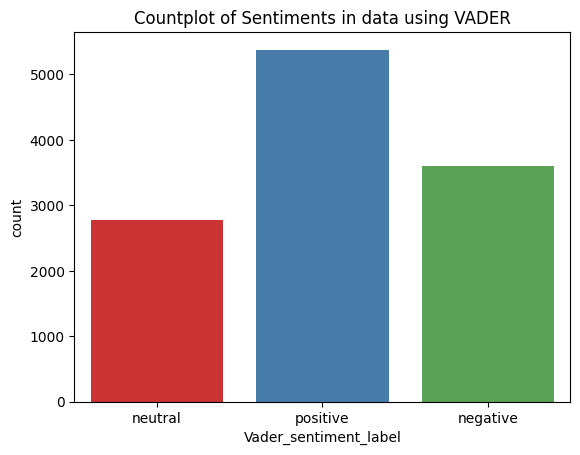

<Figure size 1000x1000 with 0 Axes>

In [20]:
# Displaying the sentiments on a countplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Vader_sentiment_label',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using VADER')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


In [21]:
# Overall textblob sentiment distribution
sentiment_distribution = cleaned_df['TextBlob_Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 TextBlob_Sentiment
Neutral     5029
Positive    4496
Negative    2234
Name: count, dtype: int64


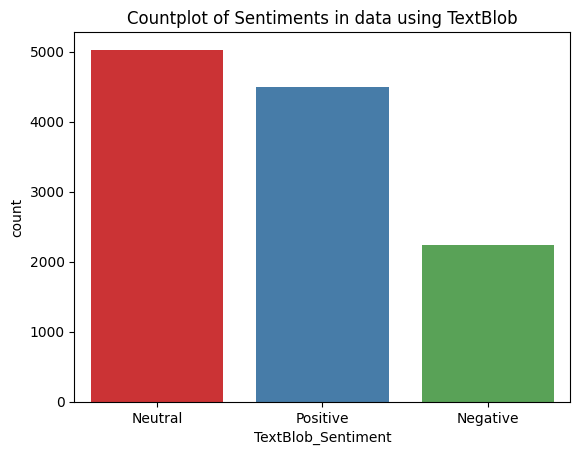

<Figure size 1000x1000 with 0 Axes>

In [22]:
sns.countplot(x = 'TextBlob_Sentiment',data = cleaned_df,palette='Set1' )
plt.title('Countplot of Sentiments in data using TextBlob')
plt.figure(figsize=(10,10),dpi=100)
plt.show()


We decided to go with the VADER Sentiment Analysis method since it is more suitable to social media data like tweets.
As shown, Kenya power customer care account in X platform (KenyaPower_Care), receives more positive posts than neutral and negative. Positive posts are 9011, negative posts are 6932, and neutral posts are 4782.

Plotting to view the frequency of keywords choosen that are in the posts, that is: 'transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power' and 'stima'.


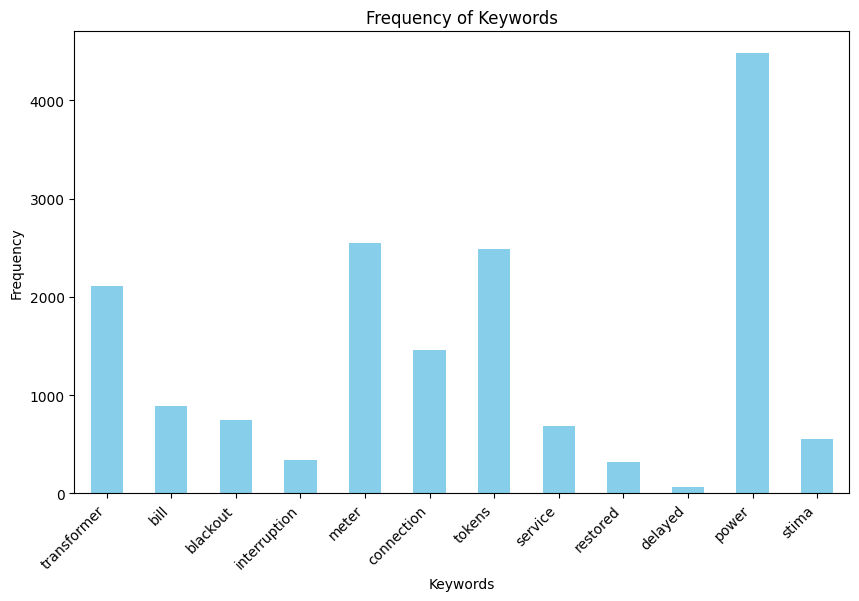

In [23]:
# Assuming your DataFrame is named df
columns_to_plot = ['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima']


# Calculate the frequency of each keyword
frequency = cleaned_df[columns_to_plot].sum()

# Plotting the frequency
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Stima is not frequently mentioned in posts since we scrapped mostly posts in the English language. The Two most mentioned keywords are 'transformers' at over 8000 and 'power' a over 7500. This is followed by keywords 'bill', 'meter' then 'tokens'. The least mentioned keyword is 'delayed'.
This will be considered during modelling.

In [24]:
frequency

transformer     2112
bill             887
blackout         752
interruption     341
meter           2548
connection      1465
tokens          2489
service          682
restored         316
delayed           67
power           4477
stima            557
dtype: int64

In [25]:
#dropping columns 
processed_df = cleaned_df.drop(['transformer', 'bill', 'blackout', 'interruption', 'meter', 
                   'connection', 'tokens', 'service', 'restored', 'delayed', 'power', 'stima', 'Handle','Date',	'Vader_sentiment_score','TextBlob_Sentiment'],axis=1)

In [26]:
processed_df.head()

,Post,Vader_sentiment_label
0,already blackout,neutral
1,blackout whole njoro egerton university area p...,positive
2,blackout please resolve,positive
3,kindly check power line weve blackout yesterda...,positive
4,kindly check power line weve blackout yesterda...,positive


In [27]:
# Tokenize the text in the 'Post' column
processed_df['tokens'] = processed_df['Post'].apply(word_tokenize)

processed_df

,Post,Vader_sentiment_label,tokens
0,already blackout,neutral,"[already, blackout]"
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ..."
2,blackout please resolve,positive,"[blackout, please, resolve]"
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y..."
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y..."
...,...,...,...
14501,changed bill payment methods accounts want pay...,negative,"[changed, bill, payment, methods, accounts, wa..."
14505,hello paid prepaid bill wrong meter number kin...,positive,"[hello, paid, prepaid, bill, wrong, meter, num..."
14506,thank finally acting however issue transformer...,positive,"[thank, finally, acting, however, issue, trans..."
14507,cant power black outs every two days please so...,positive,"[cant, power, black, outs, every, two, days, p..."


In [29]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [30]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatize the tokens
processed_df['lemmatized'] = processed_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, 
                          relative_scaling=0.5, colormap='Dark2').generate(all_words)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

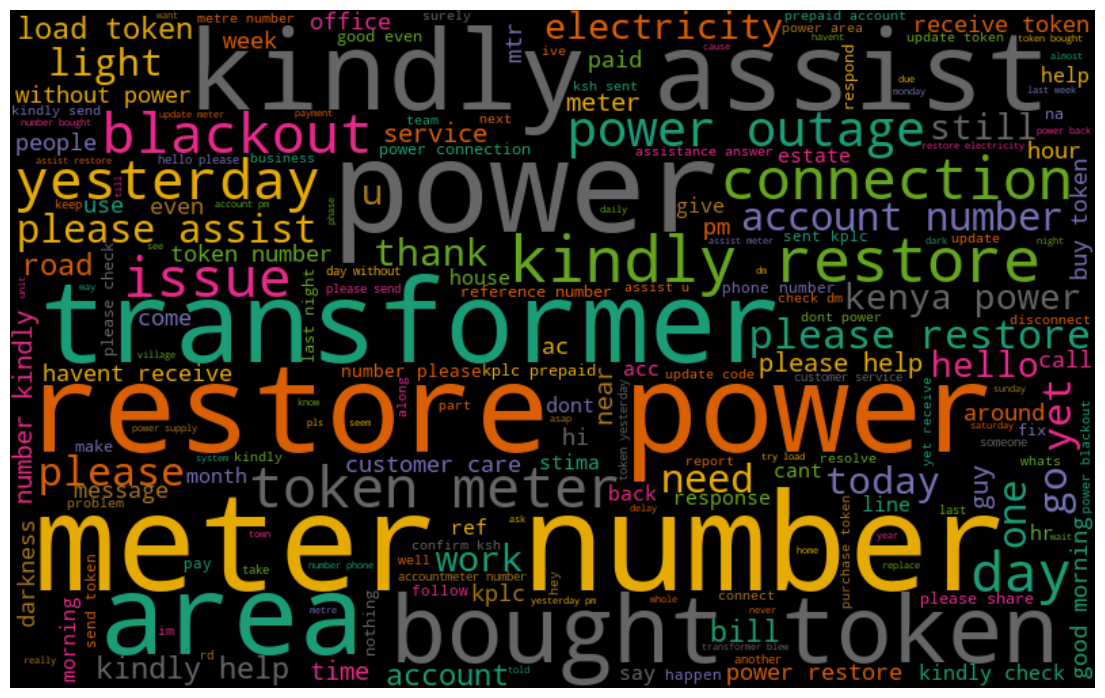

In [32]:
# Generate word cloud for positive tweets
all_words = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'positive']])
generate_wordcloud(all_words)

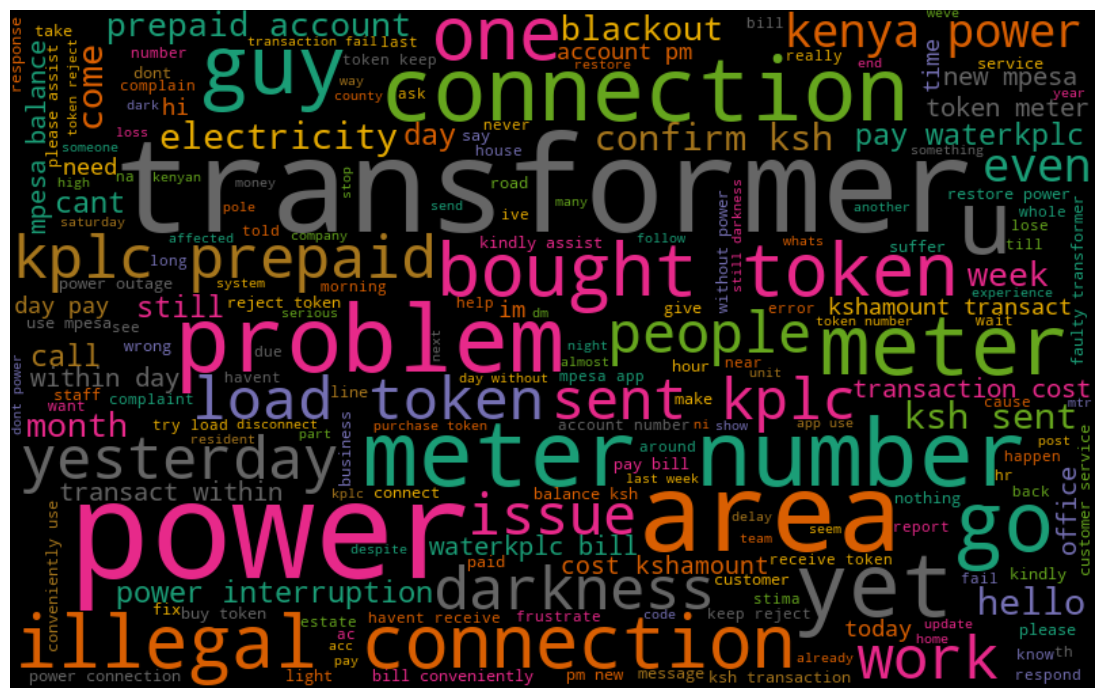

In [33]:
# Generate word cloud for negative tweets
all_words_negative = ' '.join([' '.join(text) for text in processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'negative']])
generate_wordcloud(all_words_negative)

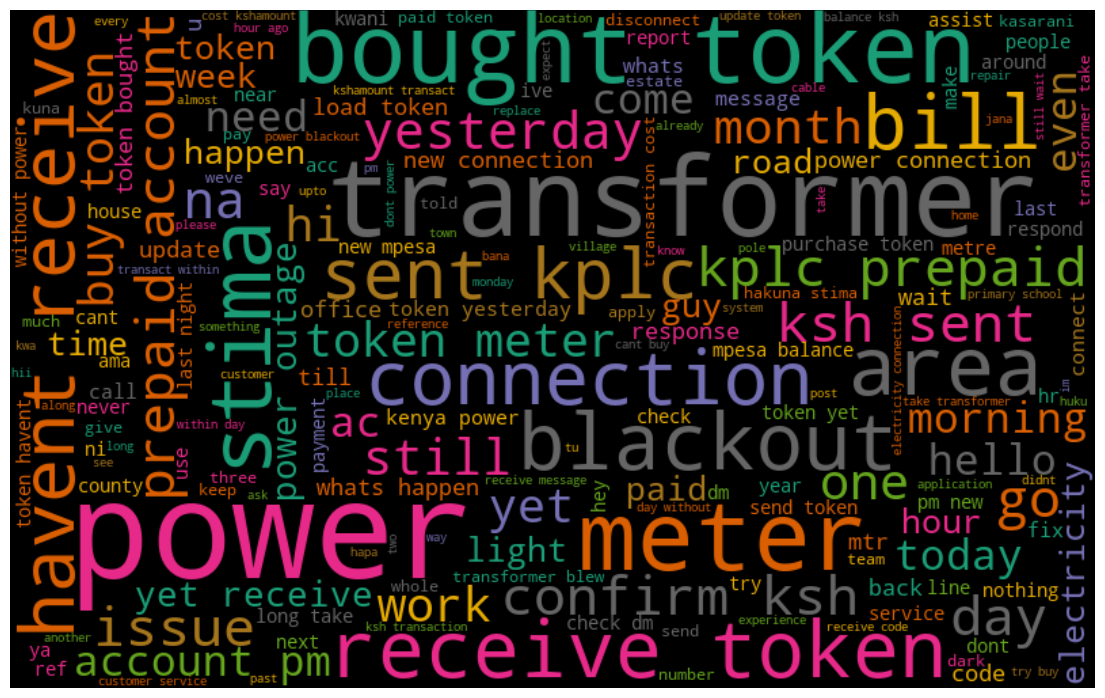

In [34]:
# Generate word cloud for neutral tweets
all_words_neutral = ' '.join([' '.join(text) for text in  processed_df['lemmatized'][processed_df['Vader_sentiment_label'] == 'neutral']])
generate_wordcloud(all_words_neutral)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Vectorize the lemmatized column
X_count = count_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert to DataFrame for easier interpretation
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

print(count_df.head())

   aa  aaii  abadare  abandon  abardare  abasalama  abc  abdulhakim  abeid  \
0   0     0        0        0         0          0    0           0      0   
1   0     0        0        0         0          0    0           0      0   
2   0     0        0        0         0          0    0           0      0   
3   0     0        0        0         0          0    0           0      0   
4   0     0        0        0         0          0    0           0      0   

   abhorrent  ...  zmerudi  zn  znaingia  znapanda  zone  zoom  zoomteams  \
0          0  ...        0   0         0         0     0     0          0   
1          0  ...        0   0         0         0     0     0          0   
2          0  ...        0   0         0         0     0     0          0   
3          0  ...        0   0         0         0     0     0          0   
4          0  ...        0   0         0         0     0     0          0   

   zooooote  zote  zungusha  
0         0     0         0  
1       

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit the number of features to, for example, 5000 most common words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a sparse DataFrame
sparse_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the sparse DataFrame
print(sparse_tfidf.head())

    aa  abadare  abandon  abasalama  abide  able  abothoguchi  abroad  \
0  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
1  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
2  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
3  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   
4  0.0      0.0      0.0        0.0    0.0   0.0          0.0     0.0   

   absolutely  abstract  ...  zinapotea  zingine  zipotee  zishaharibika  \
0         0.0       0.0  ...        0.0      0.0      0.0            0.0   
1         0.0       0.0  ...        0.0      0.0      0.0            0.0   
2         0.0       0.0  ...        0.0      0.0      0.0            0.0   
3         0.0       0.0  ...        0.0      0.0      0.0            0.0   
4         0.0       0.0  ...        0.0      0.0      0.0            0.0   

   zisinyeshewe  zitakuwa  ziwani   zn  zone  zote  
0           0.0       0.0     0.0  0.0   0.0   0.0 

In [38]:
processed_df.head()

,Post,Vader_sentiment_label,tokens,lemmatized
0,already blackout,neutral,"[already, blackout]","[already, blackout]"
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ...","[blackout, whole, njoro, egerton, university, ..."
2,blackout please resolve,positive,"[blackout, please, resolve]","[blackout, please, resolve]"
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y..."
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y..."


In [39]:
issues = {
    "token_problem": ["token", "received token", "prepaid"],
    "power_outage": ["outage", "stima", "no lights",
                      "giza", "anua", "interruption",
                        "blackout", "power"],
    "transformer_issue": ["transformer","explode","blew","blown"],
    "billing_issues": ["bills", "overcharge", "cost", "paid",
                     "invoice"],
    "account_issues": ["account", "meter", "number","acc"]                 
}

In [40]:
def classify_issue(tweet):
    priority_order = ["power_outage", "token_problem", "billing_issues", "account_issues","transformer_issue"]
    for issue in priority_order:
        for keyword in issues[issue]:
            if keyword.lower() in tweet.lower():
                return issue
    return "other"

processed_df['Classified_Issue'] = processed_df['Post'].apply(classify_issue)

In [41]:
# Apply the classify_issue function to each tweet in the 'Post' column
processed_df['Classified_Issue'] = processed_df['Post'].apply(classify_issue)

In [42]:
processed_df.head(20)

,Post,Vader_sentiment_label,tokens,lemmatized,Classified_Issue
0,already blackout,neutral,"[already, blackout]","[already, blackout]",power_outage
1,blackout whole njoro egerton university area p...,positive,"[blackout, whole, njoro, egerton, university, ...","[blackout, whole, njoro, egerton, university, ...",power_outage
2,blackout please resolve,positive,"[blackout, please, resolve]","[blackout, please, resolve]",power_outage
3,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
4,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
5,blackout last hrs kindly work,positive,"[blackout, last, hrs, kindly, work]","[blackout, last, hr, kindly, work]",power_outage
6,kindly check power line weve blackout yesterda...,positive,"[kindly, check, power, line, weve, blackout, y...","[kindly, check, power, line, weve, blackout, y...",power_outage
7,blackout since yesterday pm meter number,positive,"[blackout, since, yesterday, pm, meter, number]","[blackout, since, yesterday, pm, meter, number]",power_outage
8,blackout since yesterday meter number,positive,"[blackout, since, yesterday, meter, number]","[blackout, since, yesterday, meter, number]",power_outage
9,blackout since yesterday pm meter number,positive,"[blackout, since, yesterday, pm, meter, number]","[blackout, since, yesterday, pm, meter, number]",power_outage


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming processed_df is your DataFrame
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(processed_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a DataFrame
sparse_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out(), index=processed_df.index)

In [44]:
# Check if indexes are aligned
print(sparse_tfidf.index.equals(processed_df.index))  # Should return True

True


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sparse_tfidf, processed_df['Classified_Issue'], test_size=0.3, random_state=42)

In [47]:
# Initialize and train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
                   precision    recall  f1-score   support

   account_issues       0.97      0.16      0.27       226
   billing_issues       0.00      0.00      0.00        87
            other       1.00      0.02      0.04       297
     power_outage       0.67      0.96      0.79      1597
    token_problem       0.85      0.96      0.90      1082
transformer_issue       1.00      0.00      0.01       239

         accuracy                           0.74      3528
        macro avg       0.75      0.35      0.34      3528
     weighted avg       0.78      0.74      0.66      3528

Naive Bayes Accuracy Score: 0.7389455782312925


In [50]:
# Predict on the test data
y_pred_nb = nb_classifier.predict(X_train)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_train, y_pred_nb))
print("Naive Bayes Accuracy Score:", accuracy_score(y_train, y_pred_nb))

Naive Bayes Classification Report:
                   precision    recall  f1-score   support

   account_issues       0.99      0.18      0.30       432
   billing_issues       0.00      0.00      0.00       195
            other       0.89      0.08      0.15       630
     power_outage       0.71      0.97      0.82      3899
    token_problem       0.88      0.97      0.92      2525
transformer_issue       1.00      0.01      0.02       550

         accuracy                           0.77      8231
        macro avg       0.75      0.37      0.37      8231
     weighted avg       0.79      0.77      0.70      8231

Naive Bayes Accuracy Score: 0.772567124286235


In [48]:
from sklearn.svm import LinearSVC

# Initialize and train the LinearSVC model
linear_svc_classifier = LinearSVC(random_state=42)
linear_svc_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_linear_svc = linear_svc_classifier.predict(X_test)

# Evaluate the model
print("Linear SVC Classification Report:")
print(classification_report(y_test, y_pred_linear_svc))
print("Linear SVC Accuracy Score:", accuracy_score(y_test, y_pred_linear_svc))

Linear SVC Classification Report:
                   precision    recall  f1-score   support

   account_issues       0.90      0.70      0.79       226
   billing_issues       0.86      0.69      0.76        87
            other       0.81      0.92      0.86       297
     power_outage       0.98      0.97      0.98      1597
    token_problem       0.97      0.99      0.98      1082
transformer_issue       0.87      0.96      0.91       239

         accuracy                           0.95      3528
        macro avg       0.90      0.87      0.88      3528
     weighted avg       0.95      0.95      0.95      3528

Linear SVC Accuracy Score: 0.9478458049886621


In [49]:
# Predict on the test data
y_pred_linear_svc = linear_svc_classifier.predict(X_train)

# Evaluate the model
print("Linear SVC Classification Report:")
print(classification_report(y_train, y_pred_linear_svc))
print("Linear SVC Accuracy Score:", accuracy_score(y_train, y_pred_linear_svc))

Linear SVC Classification Report:
                   precision    recall  f1-score   support

   account_issues       1.00      1.00      1.00       432
   billing_issues       1.00      0.98      0.99       195
            other       0.99      1.00      1.00       630
     power_outage       1.00      1.00      1.00      3899
    token_problem       1.00      1.00      1.00      2525
transformer_issue       1.00      1.00      1.00       550

         accuracy                           1.00      8231
        macro avg       1.00      1.00      1.00      8231
     weighted avg       1.00      1.00      1.00      8231

Linear SVC Accuracy Score: 0.9980561292674037


#### Neural Network

In [89]:

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from git import Tokenizer

In [82]:
class Neural_modeling:
    def __init__(self, data):
        self.data = data

    def data_prep(self): 
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(self.data['Classified_Issue'])
        tokenizer = Tokenizer(num_words=5000)
        tokenizer.fit_on_texts(self.data['Post'])
        X = tokenizer.texts_to_sequences(self.data['Post'])
        X = pad_sequences(X, maxlen=50)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test

    def modeling(self, model, X_train, X_test, y_train, y_test):
        # Compile the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Training the model
        model.fit(X_train, y_train, epochs=10, batch_size=500, validation_data=(X_test, y_test))

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f"Accuracy: {accuracy}")  

In [83]:
modeler = Neural_modeling(processed_df)

In [84]:
X_train, X_test, y_train, y_test = modeler.data_prep()

In [85]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(6, activation='softmax'))

In [86]:
modeler.modeling(model, X_train, X_test, y_train, y_test)

Epoch 1/5
19/19 [==============================] - 90s 4s/step - loss: 1.5131 - accuracy: 0.4884 - val_loss: 1.3386 - val_accuracy: 0.6645
Epoch 2/5
19/19 [==============================] - 73s 4s/step - loss: 1.1457 - accuracy: 0.6818 - val_loss: 1.0226 - val_accuracy: 0.7083
Epoch 3/5
19/19 [==============================] - 70s 4s/step - loss: 0.8559 - accuracy: 0.7456 - val_loss: 0.8408 - val_accuracy: 0.7232
Epoch 4/5
19/19 [==============================] - 82s 4s/step - loss: 0.6859 - accuracy: 0.7625 - val_loss: 0.7063 - val_accuracy: 0.7313
Epoch 5/5
74/74 [==============================] - 5s 66ms/step - loss: 0.5770 - accuracy: 0.7827
Accuracy: 0.7827380895614624
